In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

EVENT = {'INCOMING_CALL':0, 'OUTGOING_CALL':1, 'IDD_CALL':2, 'OUTGOING_SMS':4, 'INCOMING_SMS':5}

In [4]:
infile = 'cleaned_data_2.csv'

# read in csv. Convert 'EVENT_DATE' column to Timestamp
raw_data = pd.read_csv(infile, sep='|', parse_dates=['EVENT_DATE']) 
raw_data['DURATION'] = pd.to_timedelta(raw_data['DURATION'])
raw_data

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
0,716124013,002122460381500710861980,5,2015-02-15 08:08:23,00:00:00,0.0
1,716124013,002122460381500710861980,5,2015-02-16 08:06:35,00:00:00,0.0
2,716124013,002122460381500710861980,5,2015-02-16 08:06:41,00:00:00,0.0
3,716124013,002122460381500710861980,5,2015-02-17 17:30:20,00:00:00,0.0
4,716124013,002122460381500710861980,5,2015-02-17 17:30:26,00:00:00,0.0
5,716124013,002122460381500710861980,5,2015-03-05 18:57:21,00:00:00,0.0
6,716124013,002122460381500710861980,5,2015-03-05 18:57:27,00:00:00,0.0
7,716124013,002122460381500710861980,5,2015-03-13 15:11:29,00:00:00,0.0
8,716124013,002122460381500710861980,5,2015-03-13 15:11:36,00:00:00,0.0
9,716124013,002122460381500710861980,5,2015-03-15 20:31:23,00:00:00,0.0


In [5]:
# Remove all call centre records
data_no_cc = raw_data[raw_data['B_NUMBER'].str.len() < 20]
data_no_cc

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
28,716124013,00947100340,5,2015-02-16 21:32:52,00:00:00,0.0
29,716124013,00947100340,5,2015-03-03 11:26:08,00:00:00,0.0
78,716124013,0372260301,1,2015-03-15 07:01:26,00:00:25,2.0
79,716124013,0373612725,1,2015-03-20 08:22:55,00:00:19,2.0
80,716124013,0373612725,1,2015-03-20 16:23:49,00:00:21,2.0
81,716124013,0375615918,1,2015-03-13 10:00:01,00:00:14,2.0
82,716124013,0375615918,1,2015-03-15 18:13:57,00:00:36,2.0
83,716124013,0375615918,1,2015-03-15 18:25:57,00:00:36,2.0
84,716124013,0375615918,1,2015-03-29 17:44:34,00:00:12,2.0
98,716124013,0710108518,0,2015-02-03 09:25:29,00:00:22,0.0


In [8]:
group = data_no_cc.groupby('A_NUMBER')

def aggregations(x):
    first_recds = x['EVENT_DATE'].min()
    last_recds = x['EVENT_DATE'].max()
    total_recds = len(x)
    
    num_out_calls = len(x[x['EVENT_TYPE']==EVENT['OUTGOING_CALL']])
    out_duration = x[x['EVENT_TYPE']==EVENT['OUTGOING_CALL']]['DURATION'].sum()
    out_duration_sec = out_duration/np.timedelta64(1,'s')
    
    num_in_calls = len(x[x['EVENT_TYPE']==EVENT['INCOMING_CALL']])
    in_duration = x[x['EVENT_TYPE']==EVENT['INCOMING_CALL']]['DURATION'].sum()
    in_duration_sec = in_duration/np.timedelta64(1,'s')
    
    num_IDD_calls = len(x[x['EVENT_TYPE']==EVENT['IDD_CALL']])
    num_out_sms = len(x[x['EVENT_TYPE']==EVENT['OUTGOING_SMS']])
    num_in_sms = len(x[x['EVENT_TYPE']==EVENT['INCOMING_SMS']])
    
    return pd.Series([first_recds, 
                      last_recds, 
                      total_recds, 
                      
                      num_out_calls, 
                      out_duration,
                      out_duration_sec,
                      
                      num_in_calls, 
                      in_duration,
                      in_duration_sec,
                      
                      num_IDD_calls, 
                      num_out_sms, 
                      num_in_sms]
                      , index=['first recds', 'last recds', 'total records', 'num outgoing calls', 
                               'out duration', 'out duration in sec', 'num incoming calls', 'in duration',
                               'in duration in sec', 'num IDD calls',
                              'num outgoing sms', 'num incoming sms'])

summary = group.apply(aggregations) 

In [10]:
summary

,first recds,last recds,total records,num outgoing calls,out duration,out duration in sec,num incoming calls,in duration,in duration in sec,num IDD calls,num outgoing sms,num incoming sms
A_NUMBER,,,,,,,,,,,,
710000810,2014-10-01 07:16:46,2015-03-31 15:27:53,2275,1004,0 days 19:30:22,70222,1173,0 days 22:11:50,79910,0,23,75
710002560,2014-10-01 06:01:11,2015-03-31 23:50:08,2818,1499,3 days 06:00:51,280851,456,0 days 10:00:42,36042,0,294,569
710003902,2014-10-01 04:14:52,2015-03-31 20:21:47,3111,2095,4 days 23:24:44,429884,972,1 days 05:43:38,107018,0,4,40
710004420,2014-10-01 11:17:05,2015-03-31 20:05:40,2008,840,0 days 17:48:09,64089,1069,0 days 16:28:57,59337,0,25,74
710004816,2014-10-01 03:37:00,2015-03-31 13:15:26,3399,1642,4 days 01:57:12,352632,1467,4 days 10:24:53,383093,0,124,166
710005499,2014-10-01 09:43:43,2015-03-31 21:10:51,2142,1046,2 days 22:44:54,254694,783,1 days 11:06:05,126365,15,30,268
710007474,2014-10-01 07:30:17,2015-03-31 20:00:37,3091,1567,2 days 01:22:24,177744,1265,0 days 19:40:37,70837,0,43,216
710008915,2015-02-18 18:04:44,2015-03-31 20:10:53,498,252,0 days 06:10:47,22247,233,0 days 04:42:20,16940,0,9,4
710008952,2014-10-01 08:47:13,2015-03-31 16:54:36,2565,1689,4 days 16:56:43,406603,826,2 days 01:35:13,178513,0,24,26


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139920b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14bb00bd0>]], dtype=object)

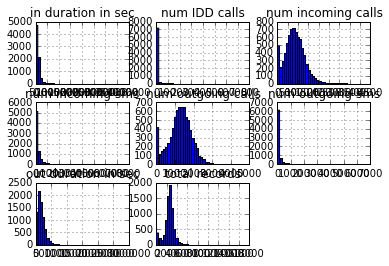

In [13]:
plt.figure()

summary.hist(bins=40)

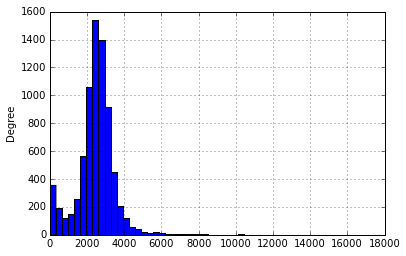

In [14]:
summary['total records'].plot(kind='hist', bins=50)

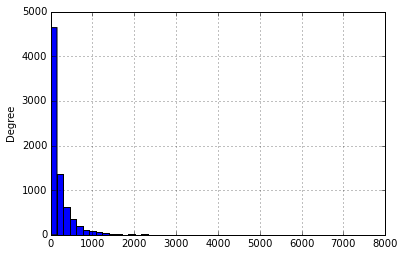

In [15]:
summary['num incoming sms'].plot(kind='hist', bins=50)